In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

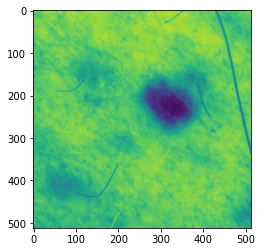

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

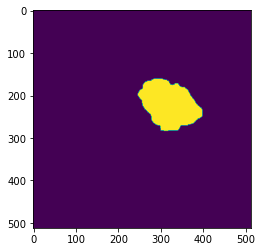

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpdx_ajc2ykuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpdx_ajc2ykuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 8

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 684ms/step - loss: 0.5545 - dice_coeff: 0.3043 - val_loss: 0.5343 - val_dice_coeff: 0.3246
Epoch 2/100
39/39 [==============================] - 19s 487ms/step - loss: 0.5150 - dice_coeff: 0.3303 - val_loss: 0.4748 - val_dice_coeff: 0.3907
Epoch 3/100
39/39 [==============================] - 19s 485ms/step - loss: 0.4308 - dice_coeff: 0.4682 - val_loss: 0.4022 - val_dice_coeff: 0.5504
Epoch 4/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4270 - dice_coeff: 0.5052 - val_loss: 0.4071 - val_dice_coeff: 0.5590
Epoch 5/100
39/39 [==============================] - 19s 494ms/step - loss: 0.4132 - dice_coeff: 0.5260 - val_loss: 0.4513 - val_dice_coeff: 0.4769
Epoch 6/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4057 - dice_coeff: 0.5252 - val_loss: 0.3938 - val_dice_coeff: 0.5511
Epoch 7/100
39/39 [==============================] - 19s 491ms/step - loss: 0.3968 - dice_coeff: 0.54

Epoch 1/100
61/61 [==============================] - 33s 545ms/step - loss: 0.3482 - dice_coeff: 0.6181 - val_loss: 0.3311 - val_dice_coeff: 0.6599
Epoch 2/100
61/61 [==============================] - 25s 417ms/step - loss: 0.3306 - dice_coeff: 0.6379 - val_loss: 0.3228 - val_dice_coeff: 0.6354
Epoch 3/100
61/61 [==============================] - 25s 419ms/step - loss: 0.3247 - dice_coeff: 0.6473 - val_loss: 0.3134 - val_dice_coeff: 0.6758
Epoch 4/100
61/61 [==============================] - 26s 422ms/step - loss: 0.3202 - dice_coeff: 0.6516 - val_loss: 0.3035 - val_dice_coeff: 0.6618
Epoch 5/100
61/61 [==============================] - 26s 423ms/step - loss: 0.3154 - dice_coeff: 0.6557 - val_loss: 0.3179 - val_dice_coeff: 0.6663
Epoch 6/100
61/61 [==============================] - 25s 420ms/step - loss: 0.3106 - dice_coeff: 0.6631 - val_loss: 0.3072 - val_dice_coeff: 0.6591
Epoch 7/100
61/61 [==============================] - 25s 420ms/step - loss: 0.2996 - dice_coeff: 0.6769 - val_lo

85/85 [==============================] - 32s 375ms/step - loss: 0.1488 - dice_coeff: 0.8423 - val_loss: 0.2225 - val_dice_coeff: 0.8060
Epoch 8/100
85/85 [==============================] - 32s 374ms/step - loss: 0.1534 - dice_coeff: 0.8374 - val_loss: 0.2116 - val_dice_coeff: 0.8076
Epoch 9/100
85/85 [==============================] - 32s 375ms/step - loss: 0.1470 - dice_coeff: 0.8449 - val_loss: 0.2221 - val_dice_coeff: 0.8126
Epoch 10/100
85/85 [==============================] - 31s 371ms/step - loss: 0.1471 - dice_coeff: 0.8435 - val_loss: 0.2069 - val_dice_coeff: 0.8207
Epoch 11/100
85/85 [==============================] - 32s 373ms/step - loss: 0.1424 - dice_coeff: 0.8500 - val_loss: 0.2139 - val_dice_coeff: 0.8153
Epoch 12/100
85/85 [==============================] - 32s 376ms/step - loss: 0.1274 - dice_coeff: 0.8651 - val_loss: 0.2066 - val_dice_coeff: 0.8176
Epoch 13/100
85/85 [==============================] - 32s 375ms/step - loss: 0.1217 - dice_coeff: 0.8718 - val_loss: 0.22

In [17]:
R.classifier_scores # after 8 runs of GP2

[[0.38902610540390015, 0.5712577700614929],
 [0.37987351417541504, 0.6070963144302368],
 [0.4092334806919098, 0.5682029724121094],
 [0.2587818503379822, 0.7346441745758057],
 [0.2610001862049103, 0.7574740648269653],
 [0.2227020412683487, 0.7939900755882263],
 [0.2507179379463196, 0.829034686088562],
 [0.3360534608364105, 0.8505020141601562]]

In [18]:
R.discriminator_scores # after 8 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

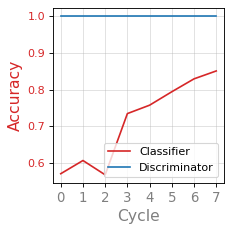

In [19]:
R.plot() # after 8 runs of GP2

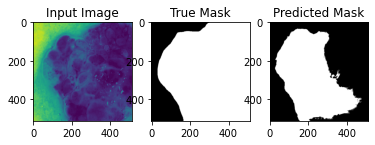

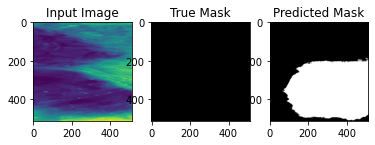

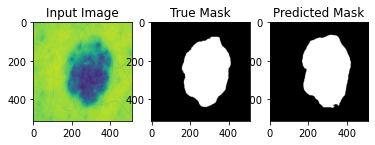

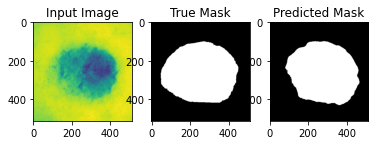

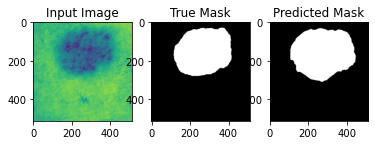

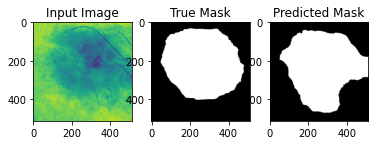

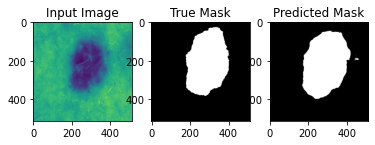

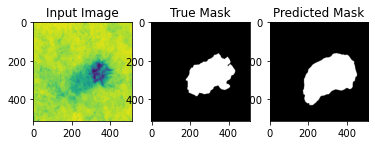

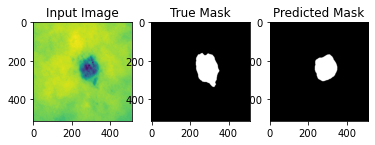

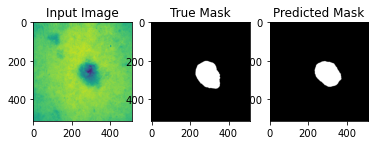

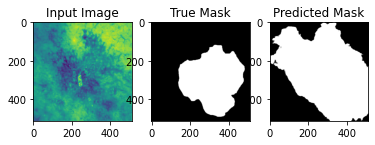

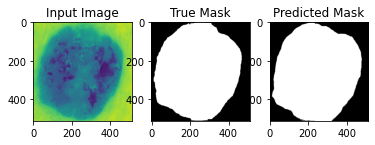

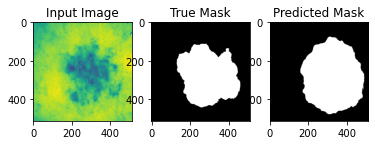

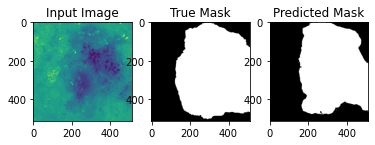

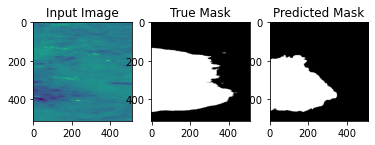

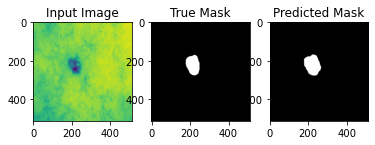

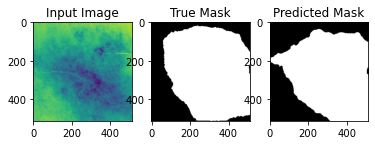

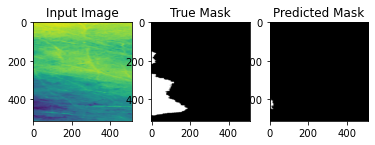

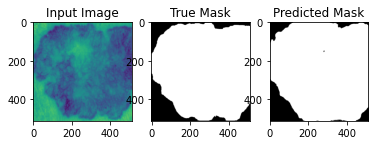

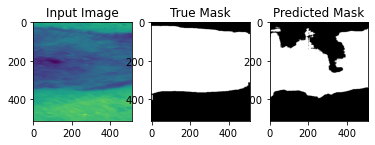

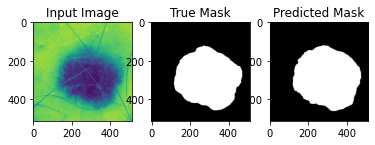

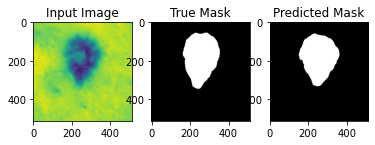

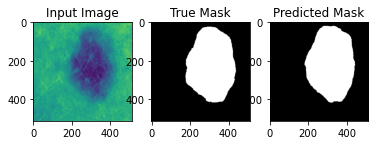

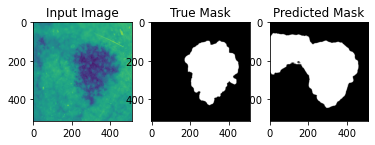

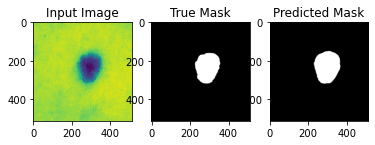

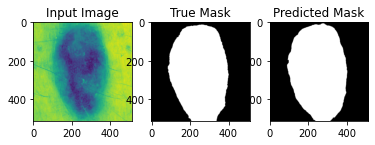

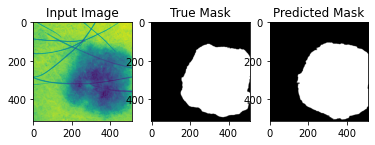

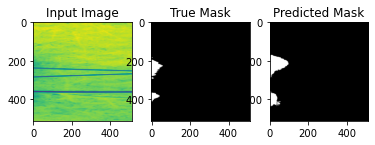

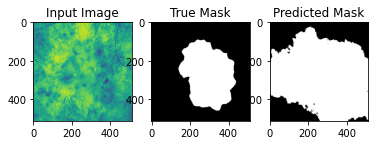

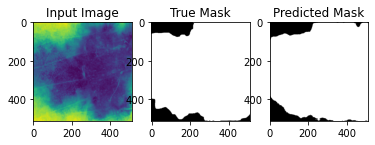

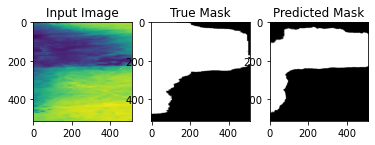

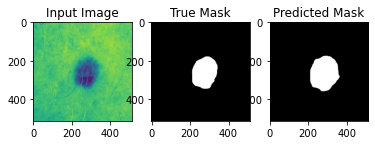

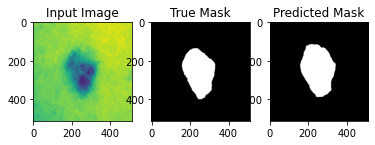

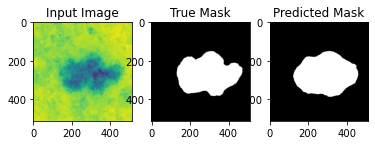

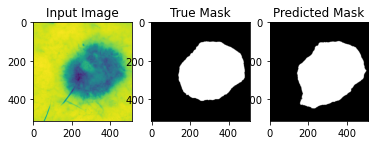

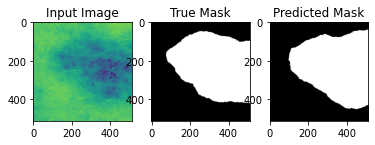

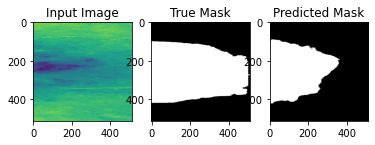

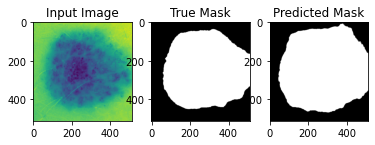

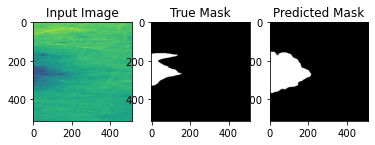

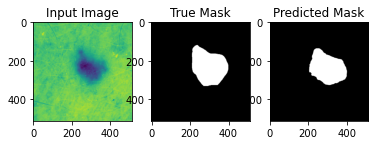

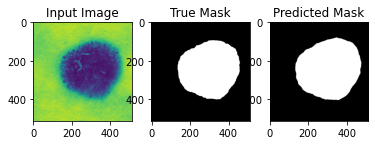

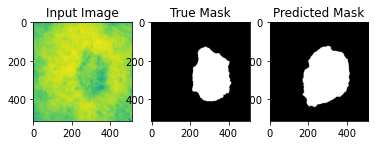

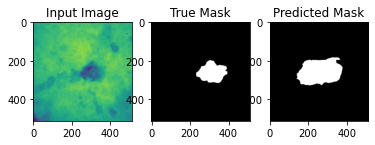

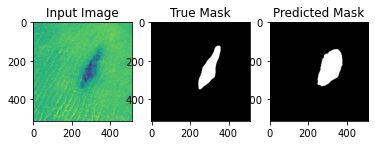

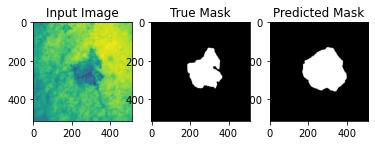

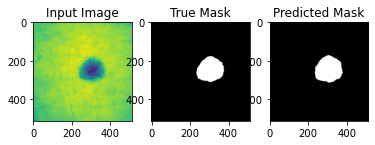

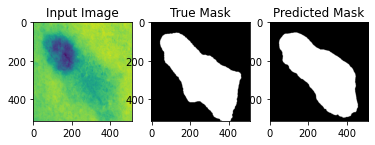

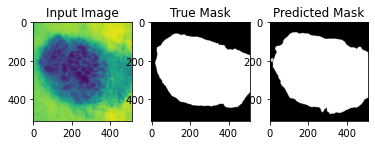

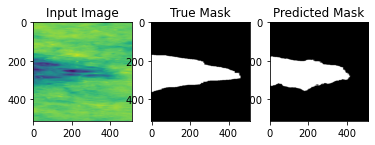

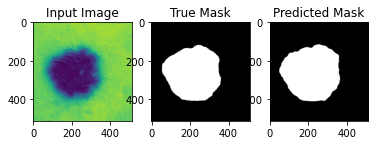

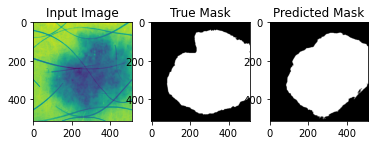

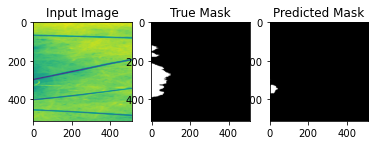

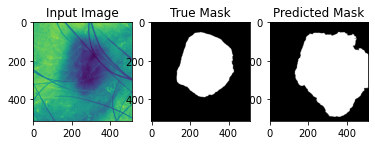

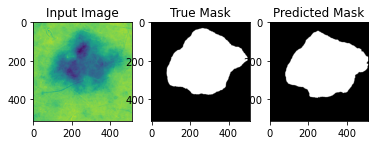

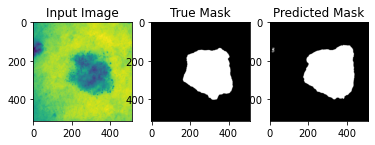

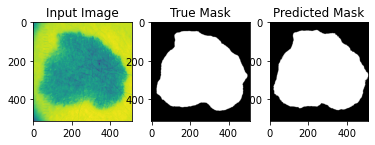

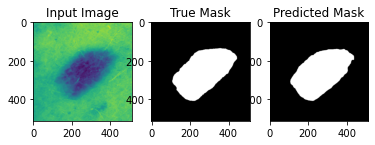

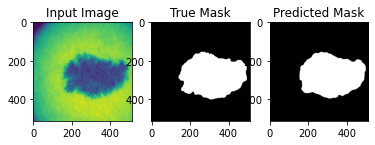

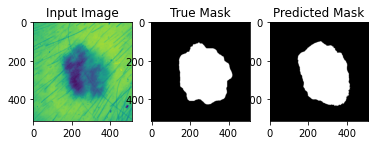

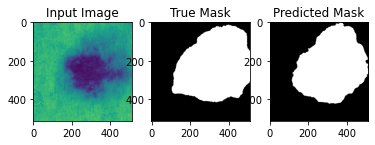

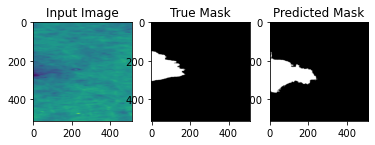

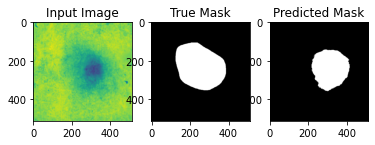

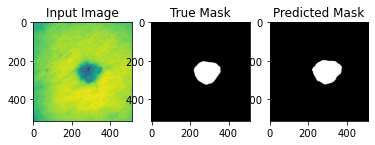

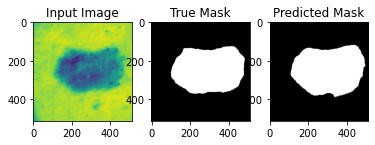

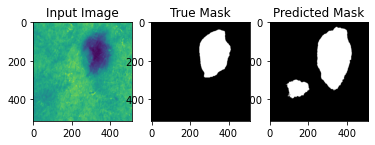

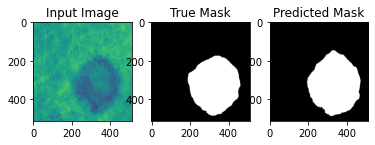

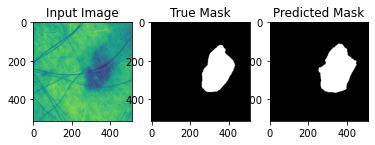

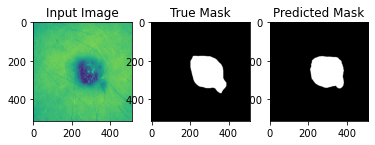

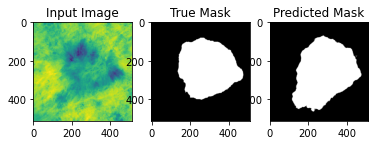

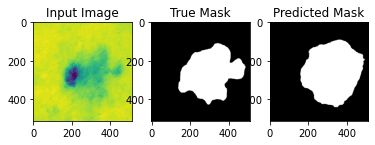

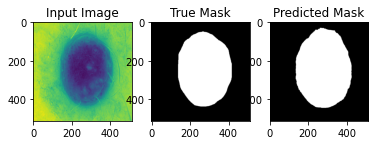

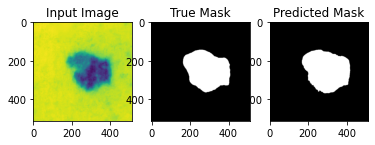

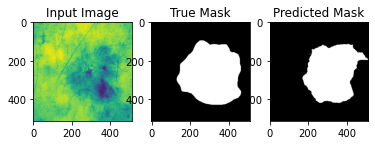

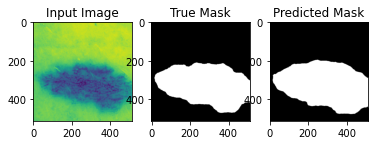

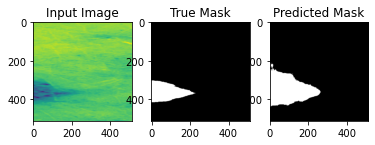

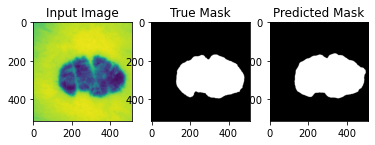

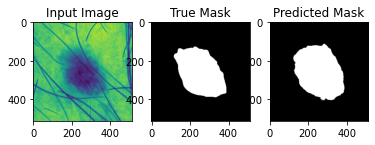

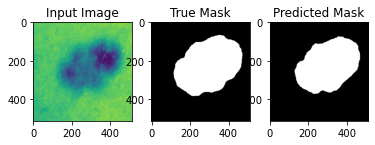

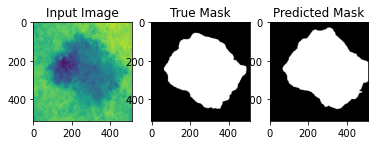

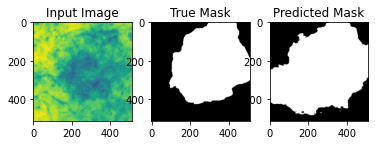

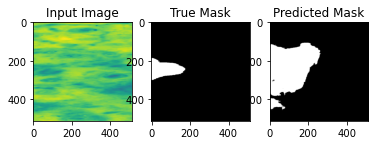

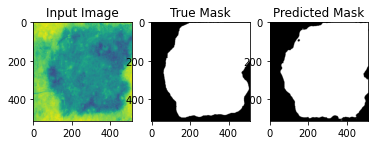

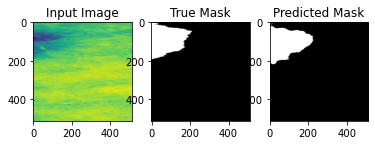

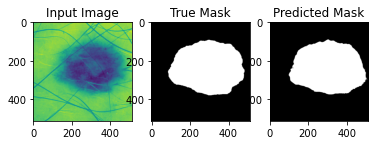

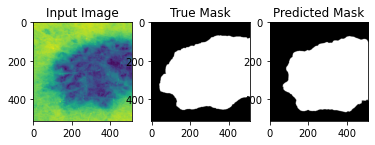

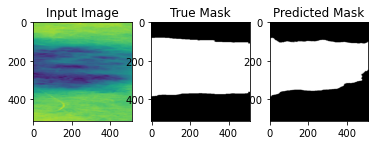

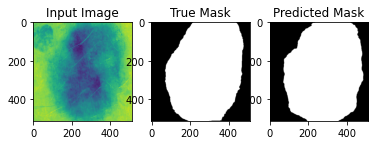

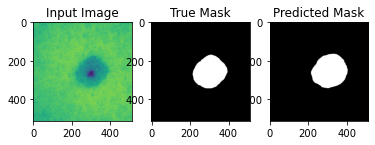

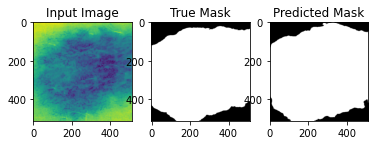

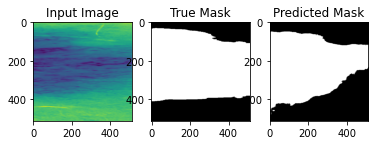

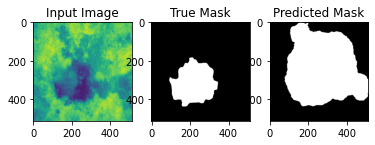

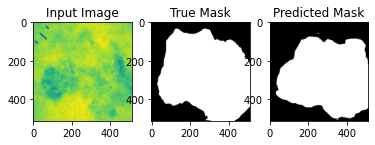

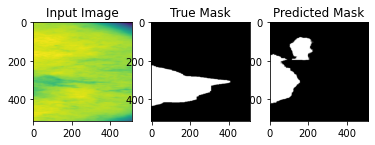

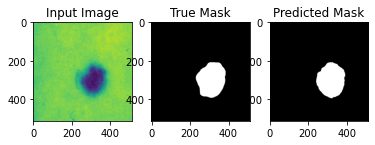

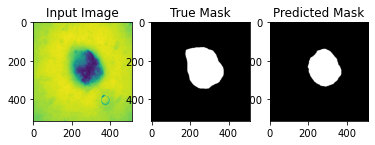

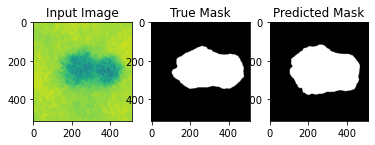

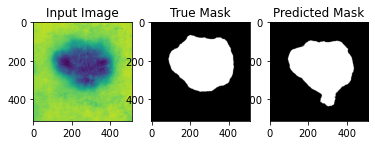

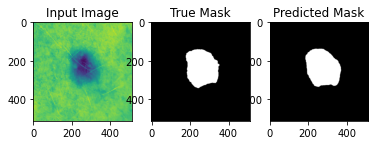

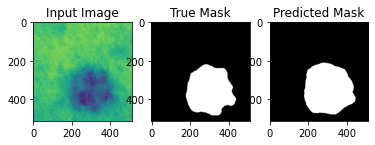

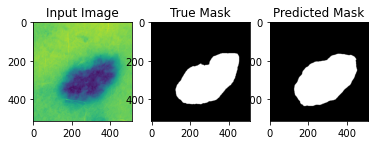

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 5 runs of GP2